In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

#### Agua

In [ ]:
agua = pd.read_excel("../../../Data/Consumos-Historicos-de-Agua-Potable-2014-2021.xlsx", sheet_name="CONSUMO HISTÓRICO",header = 2)

In [40]:
agua = agua[agua["MUNICIPIO"] == "MEDELLIN"]
agua = agua[agua["EMPRESA"] == "EMPRESAS PÚBLICAS DE MEDELLIN E.S.P."]
agua.drop(columns = ["EMPRESA","MUNICIPIO","DEPARTAMENTO","IDENTIFICADOR EMPRESA","CÓDIGO DANE"],inplace = True)
agua.drop(columns = [1,2,3,4,5,6],inplace = True)
agua.rename({"1.1":"1","2.1":"2","3.1":"3","4.1":"4","5.1":"5","6.1":"6"},axis = 1,inplace = True)

In [42]:
agua = agua.melt(id_vars = ["AÑO"],var_name = "estrato",value_name = "Consumo")

#### Comunas

In [ ]:
comunas = gpd.read_file("../../../Data/CalidadDeVida.json")

In [48]:
comunas.drop(columns = ["OBJECTID","limitemunicipioid","subtipo_comunacorregimiento","fecha_actualizacion",
                        "EstudioAprobado","PorcentajeEducado","ArriendoMensual","IngresosAnuales","ViviendaNuevaPensamiento",
                        "PorcentajeJoven","PorcentajeYE"],inplace = True)

In [54]:
comunas['Estrato'] = comunas['Estrato'].astype(str)
agua['estrato'] = agua['estrato'].astype(str)
comunas = comunas.merge(agua, left_on='Estrato', right_on='estrato')

<Axes: >

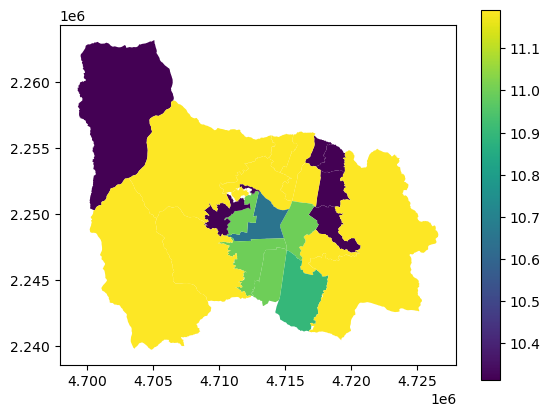

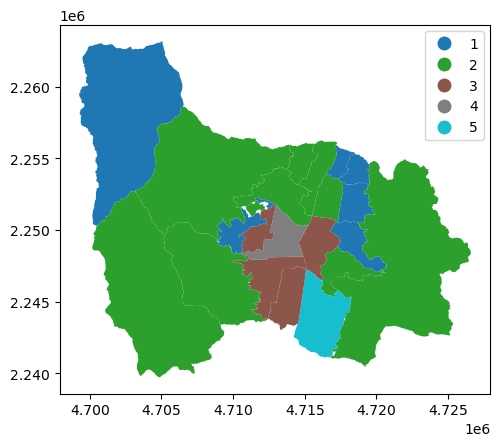

In [76]:
comunas[comunas["AÑO"] == 2021].plot(column="Consumo", legend=True)
comunas[comunas["AÑO"] == 2021].plot(column="estrato", legend=True)

In [ ]:
zonasEconomicos = gpd.read_file("../../../Data/zonas_geoeconomicas_vigen.geojson")

In [88]:
zonasEconomicos

,OBJECTID,comuna,valor_m2,cod_valor,vigencia,fecha_sincronizacion,Shape_Length,Shape_Area,geometry
0,1,06,720637,414,2024,1708101227000,2638.700416,173318.309244,"POLYGON ((4713951.039 2254521.118, 4713951.118..."
1,2,50,4207,204,2024,1708101227000,7023.136162,658846.684625,"POLYGON ((4700817.073 2261968.899, 4700815.355..."
2,3,90,358213,386,2024,1708101227000,1528.553816,34639.499837,"POLYGON ((4717278.979 2246765.535, 4717278.580..."
3,4,90,394902,390,2024,1708101227000,4537.637099,760472.905532,"POLYGON ((4718813.689 2245052.096, 4718820.922..."
4,5,13,487748,398,2024,1708101227000,6457.620460,333775.975765,"POLYGON ((4711691.279 2250781.392, 4711690.433..."
...,...,...,...,...,...,...,...,...,...
3402,3403,08,299445,378,2024,1708101234000,1825.176564,52973.678701,"POLYGON ((4719880.862 2247325.790, 4719879.076..."
3403,3404,08,258646,372,2024,1708101234000,1393.720800,41498.548844,"POLYGON ((4719981.443 2247319.847, 4719983.736..."
3404,3405,08,271578,374,2024,1708101234000,1862.700094,22118.486422,"POLYGON ((4720432.993 2247524.361, 4720411.172..."
3405,3406,08,299445,378,2024,1708101234000,71.553997,283.221792,"POLYGON ((4720480.413 2247511.492, 4720480.413..."


In [87]:
zonasEconomicos.cod_valor.unique()

array([414, 204, 386, 390, 398, 324, 378, 340, 426, 402, 374, 430, 270,
       348, 410, 456, 460, 442, 422, 406, 454, 394, 418, 434, 488, 508,
       464, 468, 360, 372, 382, 332, 328, 446, 320, 250, 300, 344, 364,
       312, 438, 356, 274, 450, 316, 368, 246, 476, 352, 238, 520, 480,
       292, 472, 254, 286, 308, 288, 296, 336, 234, 484, 222, 242, 504,
       492, 258, 304, 230, 278, 282, 262, 266, 212, 518, 500, 546, 420,
       496, 512, 528], dtype=int64)